In [1]:
import numpy as np
import pandas as pd
import os

# Specify the directory path where your images are located
image_directory = "C:\\Users\\Kishan raj\\Documents\\GitHub\\EduQuest\\eye_track\\Images"

# List all files in the specified directory
for filename in os.listdir(image_directory):
    if os.path.isfile(os.path.join(image_directory, filename)):
        print(os.path.join(image_directory, filename))


In [2]:
import numpy as np 
import pandas as pd 
import os
import tensorflow as tf

from glob import glob
from tqdm import tqdm

import matplotlib.pyplot as plt
from PIL import Image

In [17]:
X = []
Y = []

for i in tqdm(glob('C:/Users/Kishan raj/Documents/GitHub/EduQuest/eye_track/Images/train/focus/*')):
    temp = np.array(Image.open(i).resize((64,64)))
    X.append(temp)
    Y.append(1)
    
for i in tqdm(glob('C:/Users/Kishan raj/Documents/GitHub/EduQuest/eye_track/Images/train/unfocus/*')):
    temp = np.array(Image.open(i).resize((64,64)))
    X.append(temp)
    Y.append(0)  

100%|██████████| 316/316 [00:23<00:00, 13.55it/s]


In [18]:
X = np.array(X)
X = X/255.0
Y = np.array(Y)

In [19]:
X.shape

(782, 64, 64, 3)

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Conv2D, BatchNormalization, MaxPooling2D,Dropout, Flatten

In [22]:
model = tf.keras.models.Sequential([
      Input(shape=(64, 64, 3)),

      Conv2D(filters = 32, kernel_size = 5, strides = 1, activation = 'relu'),
      Conv2D(filters = 32, kernel_size = 5, strides = 1, activation = 'relu', use_bias=False),
      BatchNormalization(),
      MaxPooling2D(strides = 2),
      Dropout(0.3),

      Conv2D(filters = 64, kernel_size = 3, strides = 1, activation = 'relu'),
      Conv2D(filters = 64, kernel_size = 3, strides = 1, activation = 'relu', use_bias=False),
      BatchNormalization(),
      MaxPooling2D(strides = 2),
      Dropout(0.3),

      Flatten(),
      Dense(units  = 256, activation = 'relu', use_bias=False),
      BatchNormalization(),

      Dense(units = 128, use_bias=False, activation = 'relu'),

      Dense(units = 84, use_bias=False, activation = 'relu'),
      BatchNormalization(),
      Dropout(0.3),

      Dense(units = 1, activation = 'sigmoid')
  ])

In [23]:
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [24]:
callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='prediction.keras',
    save_weights_only=False,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose =1)
model.fit(x_train, y_train, validation_split=0.2, epochs=10, batch_size=32, callbacks=callback)

Epoch 1/10
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - accuracy: 0.8538 - loss: 0.3047
Epoch 1: val_loss improved from inf to 0.61109, saving model to prediction.keras
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 264ms/step - accuracy: 0.8653 - loss: 0.2839 - val_accuracy: 0.6381 - val_loss: 0.6111
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step - accuracy: 0.9998 - loss: 0.0219
Epoch 2: val_loss improved from 0.61109 to 0.58080, saving model to prediction.keras
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 249ms/step - accuracy: 0.9997 - loss: 0.0221 - val_accuracy: 0.6381 - val_loss: 0.5808
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step - accuracy: 1.0000 - loss: 0.0068
Epoch 3: val_loss did not improve from 0.58080
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 209ms/step - accuracy: 1.0000 - loss: 0.0069 - val_accuracy: 0.6381 - val_loss: 0.6846
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step - accuracy: 0.9998 - loss: 0.0094
Epoch 4: val_loss did not improve from 0.58080
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 280ms/step - ac

In [25]:
from keras.models import save_model
save_model(model, 'detection.h5')

In [26]:
from keras.models import load_model
best_model = load_model('C:/Users/Kishan raj/Documents/GitHub/EduQuest/eye_track/prediction.keras')
best_model.evaluate(x_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.7635 - loss: 0.3055


[0.31147608160972595, 0.7451737523078918]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


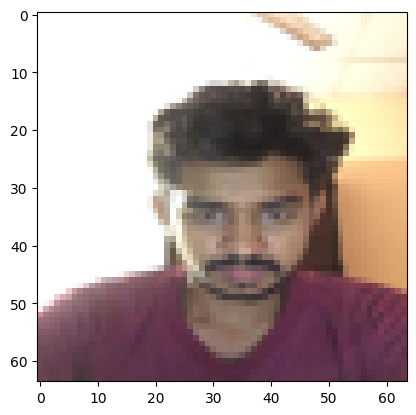

Focus
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


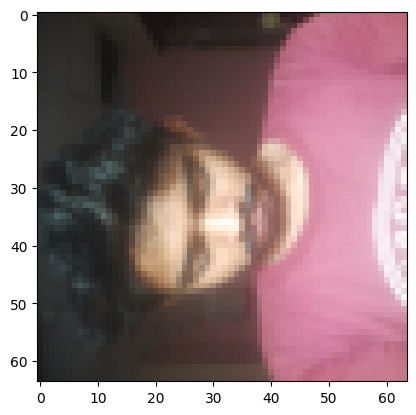

Non Focus
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


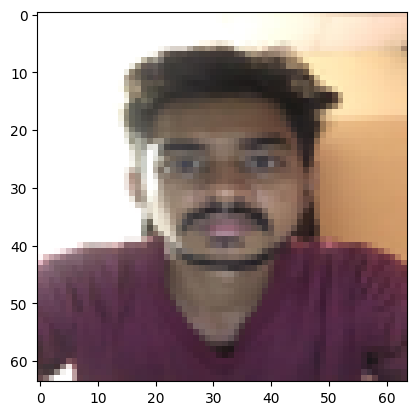

Focus
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


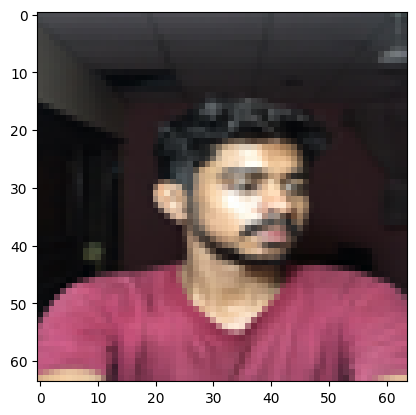

Focus
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


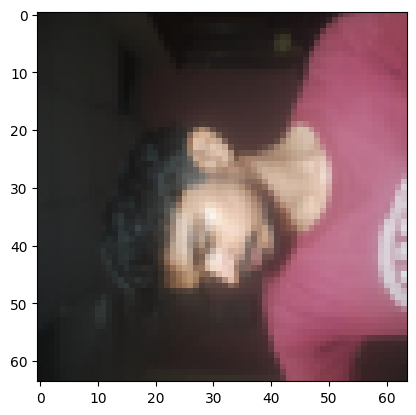

Non Focus


In [27]:
for i in x_test[10:15]:
    result = best_model.predict(np.expand_dims(i,0))
    plt.imshow(i)
    plt.show()
    
    if result > 0.5:
        print('Focus')
    else:
        print("Non Focus")

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step


Text(0.5, 25.722222222222214, 'Actual')

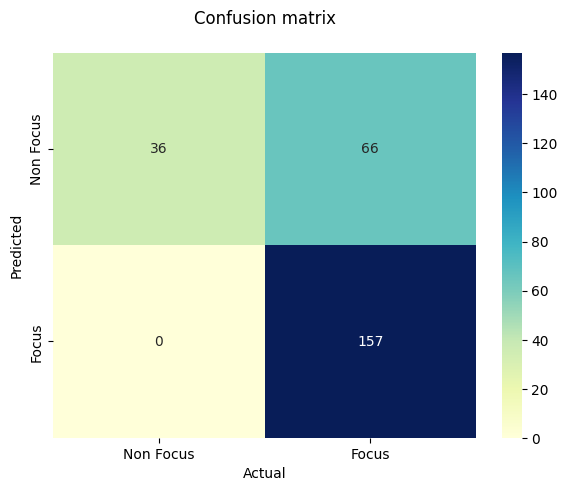

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(15, 5))

preds = best_model.predict(x_test)
preds = (preds >= 0.5).astype(np.int32)
cm = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(cm, index=['Non Focus', 'Focus'], columns=['Non Focus', 'Focus'])
plt.subplot(121)
plt.title("Confusion matrix\n")
sns.heatmap(df_cm, annot=True, fmt="d", cmap="YlGnBu")
plt.ylabel("Predicted")
plt.xlabel("Actual")